In [1]:
import os,sys
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('../LIB/')
from env import ENV

In [2]:
X_Train = pd.read_pickle(ENV.application_train_cleaned.value)
print('Train shape: {}'.format(X_Train.shape))

X_Test = pd.read_pickle(ENV.application_test_cleaned.value)
print('Test shape: {}'.format(X_Test.shape))

X_pre = pd.read_pickle(ENV.previous_application_cleaned.value)
print('Previous App shape: {}'.format(X_pre.shape))

X_bu_b = pd.read_pickle(ENV.bureau_balance_clean.value)
print('Bureau Balance shape: {}'.format(X_bu_b.shape))

X_bu = pd.read_pickle(ENV.bureau_cleaned.value)
print('Bureau shape: {}'.format(X_bu.shape))

X_ins = pd.read_pickle(ENV.installments_payments_clean.value)
print('Installment shape: {}'.format(X_ins.shape))

X_pos = pd.read_pickle(ENV.POS_CASH_balance_clean.value)
print('POS CASH shape: {}'.format(X_pos.shape))

X_cc = pd.read_pickle(ENV.credit_card_balance_clean.value)
print('Credit Card shape: {}'.format(X_cc.shape))

Train shape: (307511, 122)
Test shape: (48744, 121)
Previous App shape: (1670214, 37)
Bureau Balance shape: (27299925, 3)
Bureau shape: (1716428, 17)
Installment shape: (13605401, 8)
POS CASH shape: (10001358, 8)
Credit Card shape: (3840312, 23)


# Define Mapping

In [3]:
pre_mapping = pd.Series(index=X_pre.SK_ID_CURR.unique(),data=0) 
bu_mapping = pd.Series(index=X_bu.SK_ID_CURR.unique(),data=0) 
ins_mapping = pd.Series(index=X_ins.SK_ID_CURR.unique(),data=0) 
pos_mapping = pd.Series(index=X_pos.SK_ID_CURR.unique(),data=0) 
cc_mapping = pd.Series(index=X_cc.SK_ID_CURR.unique(),data=0) 

# Ratio View

In [4]:
mapping_dict = {'Credit Card Balance':cc_mapping,
                'Previous Application':pre_mapping,
                'Bureau':bu_mapping,
                'Installment Payment':ins_mapping,
                'POS CASH Balance':pos_mapping,
                }

def print_mapping(mapping):
    id_train = X_Train.SK_ID_CURR.map(mapping)
    id_train = id_train[id_train.notnull()]
    id_train_ratio = len(id_train) / len(X_Train)
    print('# id train can be found is {} / {}! ratio is {}'.format(len(id_train),len(X_Train),id_train_ratio))

    id_test = X_Test.SK_ID_CURR.map(mapping)
    id_test = id_test[id_test.notnull()]
    id_test_ratio = len(id_test) / len(X_Test)
    print('# id test can be found is {} / {}! ratio is {}'.format(len(id_test),len(X_Test),id_test_ratio))
     
    
for each in mapping_dict:
    print(each)
    print_mapping(mapping_dict[each])
    print('========= END ========\n')

Credit Card Balance
# id train can be found is 86905 / 307511! ratio is 0.2826077766323806
# id test can be found is 16653 / 48744! ratio is 0.34164204825209255
========= END ========

Previous Application
# id train can be found is 291057 / 307511! ratio is 0.9464929709831518
# id test can be found is 47800 / 48744! ratio is 0.9806335138683735
========= END ========

Bureau
# id train can be found is 263491 / 307511! ratio is 0.8568506492450677
# id test can be found is 42320 / 48744! ratio is 0.8682094206466436
========= END ========

Installment Payment
# id train can be found is 291643 / 307511! ratio is 0.9483985938714388
# id test can be found is 47944 / 48744! ratio is 0.9835877236172658
========= END ========

POS CASH Balance
# id train can be found is 289444 / 307511! ratio is 0.9412476301660754
# id test can be found is 47808 / 48744! ratio is 0.9807976366322009
========= END ========



# Cannot be found account

In [5]:
def null_mapping(X_Train,mapping):

    id_train = X_Train.SK_ID_CURR.map(mapping)

    id_train = id_train[id_train.isnull()]
    id_train_ratio = len(id_train) / len(X_Train)
    

   
    return list(id_train.index.values)

In [6]:
result = []
for each in mapping_dict:
    print(each)
    result.append(null_mapping(X_Train,mapping_dict[each]))
    
    
r = set(result[0])
for each in result[1:]:
    r = r.intersection(set(each))
id_train_ratio = len(r)/len(X_Train)
print('Sumary: id train can not be found is {} / {}! ratio is {}'.format(len(r),len(X_Train),id_train_ratio))

Credit Card Balance
Previous Application
Bureau
Installment Payment
POS CASH Balance
Sumary: id train can not be found is 2200 / 307511! ratio is 0.007154215621555001


In [7]:
result = []
for each in mapping_dict:
    print(each)
    result.append(null_mapping(X_Test,mapping_dict[each]))
    
    
r = set(result[0])
for each in result[1:]:
    r = r.intersection(set(each))
id_train_ratio = len(r)/len(X_Test)
print('Sumary: id train can not be found is {} / {}! ratio is {}'.format(len(r),len(X_Test),id_train_ratio))

Credit Card Balance
Previous Application
Bureau
Installment Payment
POS CASH Balance
Sumary: id train can not be found is 160 / 48744! ratio is 0.003282455276546857


(array([14.,  8.,  9.,  4.,  9.,  6., 13.,  8.,  9.,  9.,  7.,  8.,  7.,
         6.,  4.,  4.,  6.,  9.,  9., 11.]),
 array([307921. , 310327.5, 312734. , 315140.5, 317547. , 319953.5,
        322360. , 324766.5, 327173. , 329579.5, 331986. , 334392.5,
        336799. , 339205.5, 341612. , 344018.5, 346425. , 348831.5,
        351238. , 353644.5, 356051. ]),
 <a list of 20 Patch objects>)

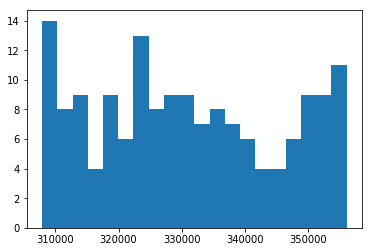

In [8]:
plt.hist(list(r),bins=20)

In [9]:
len(r)

160

In [10]:
result[0]

[307511,
 307512,
 307515,
 307517,
 307518,
 307521,
 307523,
 307524,
 307525,
 307528,
 307530,
 307531,
 307532,
 307536,
 307537,
 307539,
 307540,
 307541,
 307542,
 307543,
 307545,
 307546,
 307547,
 307548,
 307549,
 307550,
 307551,
 307554,
 307555,
 307556,
 307557,
 307558,
 307559,
 307560,
 307562,
 307563,
 307567,
 307568,
 307570,
 307571,
 307572,
 307573,
 307574,
 307575,
 307576,
 307577,
 307578,
 307580,
 307582,
 307583,
 307585,
 307586,
 307588,
 307589,
 307590,
 307591,
 307592,
 307593,
 307595,
 307596,
 307597,
 307598,
 307599,
 307600,
 307601,
 307602,
 307603,
 307604,
 307605,
 307609,
 307610,
 307613,
 307614,
 307615,
 307617,
 307619,
 307620,
 307622,
 307623,
 307624,
 307626,
 307627,
 307628,
 307629,
 307630,
 307631,
 307632,
 307635,
 307636,
 307637,
 307638,
 307639,
 307640,
 307642,
 307644,
 307646,
 307647,
 307649,
 307650,
 307652,
 307653,
 307654,
 307656,
 307658,
 307659,
 307660,
 307661,
 307662,
 307663,
 307666,
 307667,
 